# Problem Set 3

## Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.               
Occupations
>Step 1. Import the necessary libraries     
>Step 2. Import the dataset from this address.      
>Step 3. Assign it to a variable called users          
>Step 4. Discover what is the mean age per occupation            
>Step 5. Discover the Male ratio per occupation and sort it from the most to the least        
>Step 6. For each occupation, calculate the minimum and maximum ages                
>Step 7. For each combination of occupation and sex, calculate the mean age            
>Step 8. For each occupation present the percentage of women and men

In [140]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
read_data=requests.get(url).content
users= pd.read_table(io.StringIO(read_data.decode("utf-8")),sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [141]:
occu=users.groupby("occupation")
occu.age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [142]:
# Get the total count per occupation
usersByOccupationCount = users.groupby('occupation').count()


# Get the male users by occupation.
maleUsersByOccupationCount = users[users.gender == 'M'].groupby('occupation').count()


# Compute the male Ratio
maleRatio = maleUsersByOccupationCount/usersByOccupationCount


# Sort the male ratio
maleRatio.sort_values(by=['user_id'], inplace=True, ascending=False)


# Print the male ratio
maleRatio['user_id']

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: user_id, dtype: float64

In [143]:
# Maximum age per occupation
users.groupby('occupation')['age'].max()


occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

In [144]:
# Minimum age per occupation
users.groupby('occupation')['age'].min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [145]:
# Mean age by gender and occupation
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [146]:
# Total count by occupation
usersByOccupationCount = users.groupby('occupation').count()

In [147]:

# Percentage of men
maleUsersByOccupationCount = users[users.gender == 'M'].groupby('occupation').count()
maleRatio = maleUsersByOccupationCount/usersByOccupationCount
(maleRatio*100)['user_id']


occupation
administrator     54.430380
artist            53.571429
doctor           100.000000
educator          72.631579
engineer          97.014925
entertainment     88.888889
executive         90.625000
healthcare        31.250000
homemaker         14.285714
lawyer            83.333333
librarian         43.137255
marketing         61.538462
none              55.555556
other             65.714286
programmer        90.909091
retired           92.857143
salesman          75.000000
scientist         90.322581
student           69.387755
technician        96.296296
writer            57.777778
Name: user_id, dtype: float64

In [148]:
# Percentage of women
femaleUsersByOccupationCount = users[users.gender == 'F'].groupby('occupation').count()
femaleRatio = femaleUsersByOccupationCount/usersByOccupationCount
(femaleRatio*100)['user_id']

occupation
administrator    45.569620
artist           46.428571
doctor                 NaN
educator         27.368421
engineer          2.985075
entertainment    11.111111
executive         9.375000
healthcare       68.750000
homemaker        85.714286
lawyer           16.666667
librarian        56.862745
marketing        38.461538
none             44.444444
other            34.285714
programmer        9.090909
retired           7.142857
salesman         25.000000
scientist         9.677419
student          30.612245
technician        3.703704
writer           42.222222
Name: user_id, dtype: float64

## Question 2
Euro Teams
>Step 1. Import the necessary libraries     
>Step 2. Import the dataset from this address      
>Step 3. Assign it to a variable called euro12           
>Step 4. Select only the Goal column                 
>Step 5. How many team participated in the Euro2012?                 
>Step 6. What is the number of columns in the dataset?                 
>Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline                   
>Step 8. Sort the teams by Red Cards, then to Yellow Cards                       
>Step 9. Calculate the mean Yellow Cards given per Team      
>Step 10. Filter teams that scored more than 6 goals                
>Step 11. Select the teams that start with G               
>Step 12. Select the first 7 columns           
>Step 13. Select all columns except the last 3          
>Step 14. Present only the Shooting Accuracy from England, Italy and Russia            

In [149]:
#Step 1. Import the necessary libraries
import pandas as pd

#Step 2. Import the dataset
#Step 3. Assign it to a variable called euro12

euro12=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')


#Step 4. Select only the Goal column
euro12['Goals']


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [150]:

#Step 5. How many team participated in the Euro2012?
len(euro12['Team'].unique())



16

In [151]:
#Step 6. What is the number of columns in the dataset?
len(euro12.columns)


35

In [152]:

#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline=euro12[['Team','Yellow Cards','Red Cards']]

#Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(['Red Cards','Yellow Cards'], ascending=[True, True])




,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [153]:
#Step 9. Calculate the mean Yellow Cards given per Team
discipline.groupby('Team')['Yellow Cards'].mean()


Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

In [154]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12.Goals > 6]



,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [155]:
#Step 11. Select the teams that start with G
euro12[euro12.Team.str[0] == 'G']



,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [156]:
#Step 12. Select the first 7 columns
euro12.iloc[: , 0:7]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [157]:

#Step 13. Select all columns except the last 3
euro12.iloc[: , :-3]



,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [158]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[[3,7,12] , ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3
Housing
>Step 1. Import the necessary libraries        
>Step 2. Create 3 differents Series, each of length 100, as follows:             
     • The first a random number from 1 to 4           
     • The second a random number from 1 to 3             
     • The third a random number from 10,000 to 30,000              
>Step 3. Create a DataFrame by joinning the Series by column              
>Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter             
>Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'           
>Step 6. Ops it seems it is going only until index 99. Is it true?             
>Step 7. Reindex the DataFrame so it goes from 0 to 299                

In [159]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))

#• The second a random number from 1 to 3
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))

#• The third a random number from 10,000 to 30,000
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

#Step 3. Create a DataFrame by joinning the Series by column
Housing = pd.concat([s1, s2, s3], axis=1)
Housing.head()



,0,1,2
0,2,1,17124
1,4,3,16841
2,2,2,12191
3,1,1,18370
4,3,3,22023


In [160]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Housing.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
Housing.head()



,bedrs,bathrs,price_sqr_meter
0,2,1,17124
1,4,3,16841
2,2,2,12191
3,1,1,18370
4,3,3,22023


In [177]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
# join concat the values
bigcolumn = pd.DataFrame(pd.concat([s1, s2, s3], axis=0))
bigcolumn.head(10)



,0
0,2
1,4
2,2
3,1
4,3
5,3
6,4
7,4
8,1
9,2


In [178]:

#Step 6. Ops it seems it is going only until index 99. Is it true?
bigcolumn.iloc[95:105,]




,0
95,3
96,3
97,1
98,2
99,4
0,1
1,3
2,2
3,1
4,3


yes it is true that it is going only until index 99.

In [163]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(inplace = True) 
bigcolumn.iloc[95:105,]

,index,0
95,95,3
96,96,3
97,97,1
98,98,2
99,99,4
100,0,1
101,1,3
102,2,2
103,3,1
104,4,3


## Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.             
Using pandas should make this exercise easier, in particular for the bonus question.                
You should be able to perform all of these operations without using a for loop or other looping construct.            
The data in 'wind.data' has the following format:           
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL                   
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71            
The first three columns are year, month, and day. The remaining 12 columns are          
average windspeeds in knots at 12 locations in Ireland on that day.
>Step 1. Import the necessary libraries            
>Step 2. Import the dataset from this address            
>Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.                  
>Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.             
>Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].                       
>Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.                 
>Step 7. Compute how many non-missing values there are in total.                         
>Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.                          
A single number for the entire dataset.                 
>Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days                          
A different set of numbers for each location.             
>Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.        
A different set of numbers for each day.                   
>Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.                   
>Step 12. Downsample the record to a yearly frequency for each location.               
>Step 13. Downsample the record to a monthly frequency for each location.             
>Step 14. Downsample the record to a weekly frequency for each location.               
>Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.           

In [197]:
# Step 1. Import the necessary libraries
import numpy as np
import pandas as pd
import datetime

# Step 2. Import the dataset from this address 
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

data=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep="\s+",parse_dates=[[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [198]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def fix_century(x):
  year=x.year-100 if x.year > 1979 else x.year
  return datetime.date(year,x.month,x.day)
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(fix_century)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [199]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [200]:
#Step 6. Compute how many values are missing for each location over the entire record.
#They should be ignored in all calculations below.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [201]:
#Step 7. Compute how many non-missing values there are in total.
data.shape[0]-data.isnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [202]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data.mean().mean()


10.227982360836924

In [203]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and 
#standard deviations of the windspeeds at each location over all the days
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [204]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and 
#standard deviations of the windspeeds across all the locations at each day.
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [205]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

data['date']=data.index
data['month']=data['date'].apply(lambda date:date.month)
data['year']=data['date'].apply(lambda date:date.year)
data['day']=data['date'].apply(lambda date:date.day)
january_winds=data.query('month==1')
january_winds
january_winds.loc[:,'RPT':'MAL'].mean()



RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [206]:
#Step 12. Downsample the record to a yearly frequency for each location.
data.query('month == 1 and day == 1')



,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1


In [210]:
#Step 13. Downsample the record to a monthly frequency for each location.
data.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,2,1961,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,3,1961,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,4,1961,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,5,1961,1
1961-06-01,15.92,9.59,12.04,8.79,11.54,6.04,9.75,8.29,9.33,10.34,10.67,12.12,1961-06-01,6,1961,1
1961-07-01,7.21,6.83,7.71,4.42,8.46,4.79,6.71,6.00,5.79,7.96,6.96,8.71,1961-07-01,7,1961,1
1961-08-01,9.59,5.09,5.54,4.63,8.29,5.25,4.21,5.25,5.37,5.41,8.38,9.08,1961-08-01,8,1961,1
1961-09-01,5.58,1.13,4.96,3.04,4.25,2.25,4.63,2.71,3.67,6.00,4.79,5.41,1961-09-01,9,1961,1


In [213]:
#Step 14. Downsample the record to a weekly frequency for each location.
data.query('day == 7or day==14 or day==21 or day==28')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79,1961-01-07,1,1961,7
1961-01-14,9.04,5.66,7.08,0.67,2.71,1.38,3.08,2.58,0.50,2.67,7.17,5.17,1961-01-14,1,1961,14
1961-01-21,14.33,10.25,11.92,6.13,10.04,7.67,8.04,9.17,7.04,7.87,6.75,12.42,1961-01-21,1,1961,21
1961-01-28,17.67,13.54,13.33,8.87,15.04,11.63,12.25,10.58,11.92,11.04,20.30,18.12,1961-01-28,1,1961,28
1961-02-07,18.05,14.37,14.88,9.75,10.96,11.17,14.21,9.71,13.04,12.25,15.21,17.58,1961-02-07,2,1961,7
1961-02-14,17.08,11.63,17.25,12.12,13.75,13.46,15.46,12.29,14.88,15.67,14.09,11.42,1961-02-14,2,1961,14
1961-02-21,7.79,8.63,6.08,2.21,7.41,4.33,3.75,7.04,4.50,7.41,12.12,6.67,1961-02-21,2,1961,21
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17,1961-02-28,2,1961,28
1961-03-07,6.46,10.50,8.00,5.41,10.58,6.58,3.63,6.67,7.08,7.04,16.08,8.75,1961-03-07,3,1961,7


In [137]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
df_1961 = data[data.index < pd.to_datetime('1962-01-01')]
df_1961.resample('W').mean()
df_1961.resample('W').min()
df_1961.resample('W').max()
df_1961.resample('W').std()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-08,2.631321,3.949525,1.604761,1.810743,3.251660,2.059546,1.872222,3.098404,1.722255,1.704941,4.349139,1.773062,0.000000,0.0,2.160247
1961-01-15,3.555392,3.148945,5.034959,3.549559,3.471726,3.251039,4.709309,3.936894,3.500975,4.084293,5.552215,4.692355,0.000000,0.0,2.160247
1961-01-22,5.337402,3.837785,5.086229,6.245541,3.612875,3.453432,5.166300,3.164990,4.169112,4.783952,3.626584,4.237239,0.000000,0.0,2.160247
1961-01-29,4.619061,5.170224,4.665843,4.301325,4.858116,3.749415,4.508449,4.436222,4.902057,3.713368,5.210726,3.874721,0.000000,0.0,2.160247
1961-02-05,5.251408,5.187395,3.975166,2.709106,2.334619,2.397066,2.423454,4.081158,2.802490,2.839501,4.210858,4.336104,0.487950,0.0,13.483676
1961-02-12,3.587677,3.608373,3.290303,2.262056,5.571108,3.048976,2.974059,3.022753,2.914760,1.746749,4.063753,1.828705,0.000000,0.0,2.160247
1961-02-19,5.064609,3.575012,4.196621,4.311569,2.321716,3.024078,4.958631,2.283444,2.560591,2.531361,5.910938,4.685377,0.000000,0.0,2.160247
1961-02-26,7.020716,5.147348,5.578470,4.482075,6.480712,5.029874,6.037916,4.869668,4.705163,4.920064,5.091162,6.182283,0.000000,0.0,2.160247


## Question 5
>Step 1. Import the necessary libraries                        
>Step 2. Import the dataset from this address.                  
>Step 3. Assign it to a variable called chipo.                   
>Step 4. See the first 10 entries                              
>Step 5. What is the number of observations in the dataset?                 
>Step 6. What is the number of columns in the dataset?                 
>Step 7. Print the name of all the columns.                             
>Step 8. How is the dataset indexed?                   
>Step 9. Which was the most-ordered item?                 
>Step 10. For the most-ordered item, how many items were ordered?                 
>Step 11. What was the most ordered item in the choice_description column?                           
>Step 12. How many items were orderd in total?                                                 
>Step 13.                                                                 
• Turn the item price into a float                 
• Check the item price type                      
• Create a lambda function and change the type of item price                      
• Check the item price type                                                            
>Step 14. How much was the revenue for the period in the dataset?              
>Step 15. How many orders were made in the period?                         
>Step 16. What is the average revenue amount per order?             
>Step 17. How many different items are sold?              

In [392]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

#Step 2. Import the dataset 
#Step 3. Assign it to a variable called chipo.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')


#Step 4. See the first 10 entries
chipo.head(10)



,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [393]:
#Step 5. What is the number of observations in the dataset?
chipo.shape[0]

4622

In [394]:
#Step 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [395]:
#Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [396]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [397]:
#Step 9. Which was the most-ordered item?
c = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
c.head(1)
#'Chicken Bowl' is the most-ordered item

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [398]:
#Step 10. For the most-ordered item, how many items were ordered?
c = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
c.head(1)
#761 items were ordered

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [399]:
#Step 11. What was the most ordered item in the choice_description column?
c = chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False)
c.head(1)



,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [400]:
#Step 12. How many items were orderd in total?
chipo.quantity.sum()



4972

In [401]:
#Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type

dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
5       10.98
6        1.69
7       11.75
8        9.25
9        9.25
10       4.45
11       8.75
12       8.75
13      11.25
14       4.45
15       2.39
16       8.49
17       8.49
18       2.18
19       8.75
20       4.45
21       8.99
22       3.39
23      10.98
24       3.39
25       2.39
26       8.49
27       8.99
28       1.09
29       8.49
        ...  
4592    11.75
4593    11.75
4594    11.75
4595     8.75
4596     4.45
4597     1.25
4598     1.50
4599     8.75
4600     4.45
4601     1.25
4602     9.25
4603     9.25
4604     8.75
4605     4.45
4606     1.25
4607    11.75
4608    11.25
4609     1.25
4610    11.75
4611    11.25
4612     9.25
4613     2.15
4614     1.50
4615     8.75
4616     4.45
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [274]:
#Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
revenue


39237.02

In [275]:

#Step 15. How many orders were made in the period?
chipo.order_id.value_counts().count()



1834

In [276]:
#Step 16. What is the average revenue amount per order?
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped['item_price'].mean()



18.81142857142869

In [277]:
#Step 17. How many different items are sold?
chipo.item_name.value_counts().count()

50

## Question 6               
Create a line plot showing the number of marriages and divorces per capita in the         
U.S. between 1867 and 2014. Label both lines and show the legend.                     
Don't forget to label your axes!                    

<Figure size 432x288 with 0 Axes>

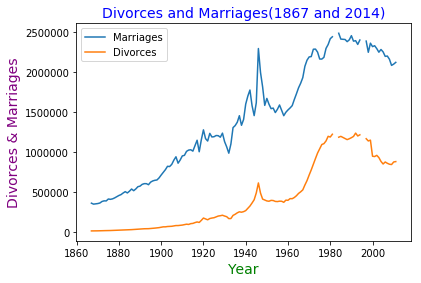

In [172]:
import pandas as pd
df=pd.read_csv('us-marriages-divorces-1867-2014.csv')
import matplotlib.pyplot as plt

plt.figure()
# ploting Marriage and Divorce
df.plot('Year',y=['Marriages','Divorces'])
# labeling x axis
plt.xlabel ('Year',color="green",fontsize=14)
# labeling y axis
plt.ylabel ('Divorces & Marriages',color="purple",fontsize=14) 
# labeling title
plt.title('Divorces and Marriages(1867 and 2014)',color="blue",fontsize=14) 
plt.show()

## Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!     

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
data1=pd.read_csv("us-marriages-divorces-1867-2014.csv")
data1.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [360]:
# Data between  1900, 1950, and 2000

df1 = data1[data1['Year'].isin(['1900','1950','2000'])]
df1.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


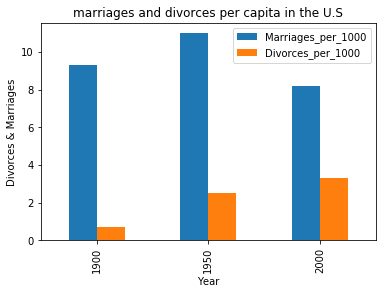

In [403]:

df1.plot.bar(x="Year",y=["Marriages_per_1000","Divorces_per_1000"] )
plt.legend()

# The following commands add labels to our figure.
plt.xlabel('Year')
plt.ylabel('Divorces & Marriages')
plt.title('marriages and divorces per capita in the U.S')

plt.show()


## Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.                    
Don't forget to label your axes!

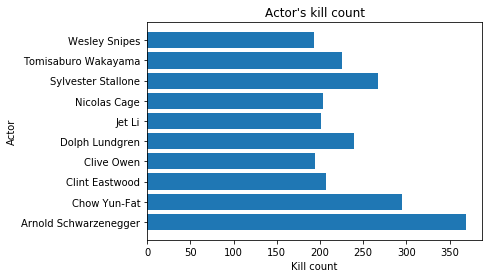

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
#read csv file
df = pd.read_csv("actor_kill_counts.csv")
#ploting bar graph
plt.barh(df['Actor'], df['Count'])
#labeling
plt.ylabel("Actor")
plt.xlabel("Kill count")
plt.title("Actor's kill count")
plt.show()

## Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.               
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [350]:
import matplotlib.pyplot as plt
import pandas as pd

# inserting data
df = pd.read_csv("roman-emperor-reigns.csv")
df.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [351]:
df1 = df[df['Cause_of_Death'] == "Assassinated" ]
df1.head()

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated


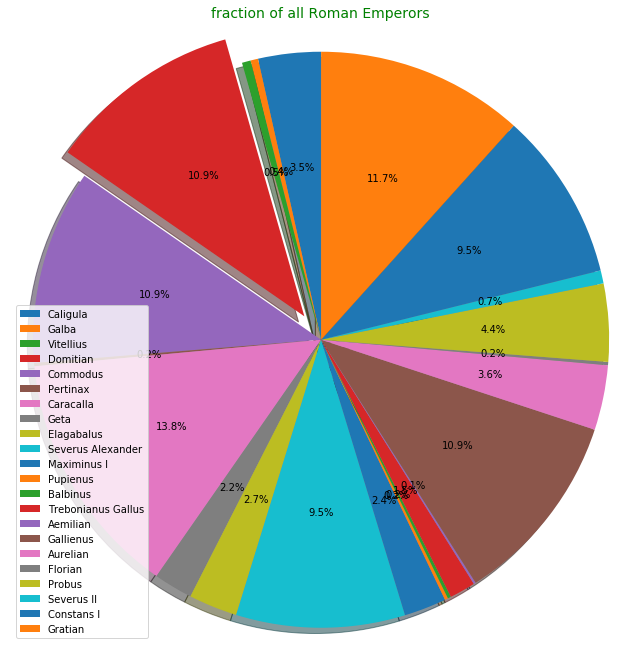

In [359]:
fig= plt.figure(figsize=(9,9))
# Plot
explode = (0, 0, 0, 0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) 
plt.pie(df1.Length_of_Reign, explode=explode ,autopct='%1.1f%%' ,shadow=True , startangle=90)
plt.legend(df1.Emperor, loc="lower left")
plt.axis('equal')
plt.tight_layout()
plt.title( "fraction of all Roman Emperors",color="Green",fontsize=14) 
plt.show()

## Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.               
Don't forget to label your axes!             
Color each dot according to its year.                

In [405]:
import pandas as pd

import matplotlib.pyplot as plt
# CSV file Reading
data=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


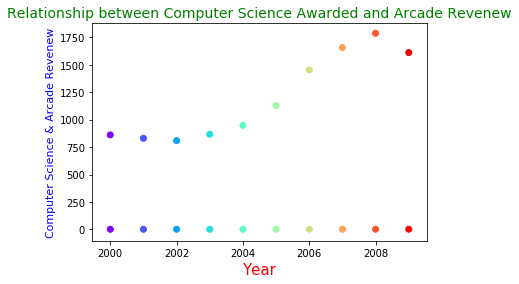

In [284]:
# making a scatter plot
plt.scatter(x="Year",y="Computer Science Doctorates Awarded (US)",c=data.Year,cmap="rainbow",data=data)
plt.scatter(x="Year",y="Total Arcade Revenue (billions)",c=data.Year,cmap="rainbow",data=data)
 # labeling x axis
plt.xlabel("Year",color="red",fontsize=15)
 # labeling y axis
plt.ylabel("Computer Science & Arcade Revenew",color="blue",fontsize=11)
 # labeling title
plt.title("Relationship between Computer Science Awarded and Arcade Revenew",color="Green",fontsize=14) 
plt.show()